In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os
import shutil
import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import TensorBoard
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from google.colab import files
from IPython.display import Image

Mounted at /content/drive


In [ ]:
path = './'

In [ ]:
#unzip the zip file state-farm-distracted-driver-detection.zip to its same directory located in ./content/drive/MyDrive/Datamining/

if os.path.exists(path + 'imgs'):
    print("The zip file has already been extracted")
else:
    zip_file = './drive/MyDrive/Datamining/state-farm-distracted-driver-detection.zip'
    zip_ref = zipfile.ZipFile(zip_file, 'r')
    zip_ref.extractall(path)
    zip_ref.close()

#delete the file driver_imgs_list.csv and sample_submission.csv
if os.path.exists(path + 'driver_imgs_list.csv'):
    os.remove(path + 'driver_imgs_list.csv')
if os.path.exists(path + 'sample_submission.csv'):
    os.remove(path + 'sample_submission.csv')
#delete the folder imgs/test and its images
if os.path.exists(path + 'imgs/test'):
    shutil.rmtree(path + 'imgs/test')

In [ ]:
#make 2 directories named test and train in the content directory with the same folders that are in the train directory
if os.path.exists(path + 'test'):
    print("The directories have already been created")
else:
    os.makedirs(path + 'test')
    os.makedirs(path + 'train')

    # Obtiene las carpetas dentro de 'train'
    folders = os.listdir(path + 'imgs/train')

    for folder in folders:
        os.makedirs(path + f'test/{folder}')
        os.makedirs(path + f'train/{folder}')

In [ ]:
#for each c0-c9 folder in the train directory, move 80% of the images to the test directory randomly
#check if the content/imgs/train/c0 folder is empty
folders = os.listdir(path + 'imgs/train')
if len(os.listdir(path + 'imgs/train/c0')) != 0:
    for folder in folders:
        images = os.listdir(path + f'imgs/train/{folder}')
        random.shuffle(images)
        n = int(len(images) * 0.15)
        test_images = images[:n]
        for img in test_images:
            shutil.move(path + f'imgs/train/{folder}/{img}', path + f'test/{folder}/{img}')

    #move the remaining 20% of the images to the train directory
    for folder in folders:
        images = os.listdir(path + f'imgs/train/{folder}')
        random.shuffle(images)
        for img in images:
            shutil.move(path + f'imgs/train/{folder}/{img}', path + f'train/{folder}/{img}')
else:
    print("The images have already been moved")



In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, )
train_generator = train_datagen.flow_from_directory(path + 'train', target_size=(96, 96), batch_size=128, class_mode='categorical', color_mode='rgb')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(path + 'test', target_size=(96, 96), class_mode='categorical', color_mode='rgb')

Found 19066 images belonging to 10 classes.
Found 3358 images belonging to 10 classes.


In [ ]:
# Definition of the image sizes
input_size = 96
num_colors = 3

# Definition of the network layers
layers = [
    # First convolution with 16 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(16,(9,9),activation='relu',input_shape=(input_size,input_size,num_colors)),
    keras.layers.MaxPooling2D(2, 2),

    # Second convolution with 32 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    # Third convolution with 64 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(64,(2,2),activation='relu'),
    keras.layers.MaxPooling2D(2,2),


    # Flattening to transform the information into a vector
    keras.layers.Flatten(),
    # Dense layer with 512 neurons and relu activation function
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    # Output layer with softmax activation function
    keras.layers.Dense(10, activation = tf.nn.softmax),
]

model = keras.Sequential(layers, name="myModel")

In [ ]:
# Optimization algorithm and loss function configuration
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Network structure
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2  (None, 44, 44, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0   

In [ ]:

# Training process execution
# Iterations: 15
# Number of steps per iteration: 4
history = model.fit(train_generator,
                    steps_per_epoch = 4,
                    epochs = 50)

# Evaluation of the model using the test set
results = model.evaluate(test_generator)

print(results)

Epoch 1/50
4/4 [==============================] - 13s 2s/step - loss: 2.3106 - accuracy: 0.0957
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 2.3071 - accuracy: 0.1113
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 2.2988 - accuracy: 0.1113
Epoch 4/50
4/4 [==============================] - 11s 2s/step - loss: 2.2990 - accuracy: 0.1055
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 2.2990 - accuracy: 0.1094
Epoch 6/50
4/4 [==============================] - 10s 2s/step - loss: 2.2879 - accuracy: 0.1172
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 2.2449 - accuracy: 0.1562
Epoch 8/50
4/4 [==============================] - 9s 2s/step - loss: 2.2394 - accuracy: 0.1758
Epoch 9/50
4/4 [==============================] - 10s 2s/step - loss: 2.1724 - accuracy: 0.2266
Epoch 10/50
4/4 [==============================] - 11s 2s/step - loss: 2.0984 - accuracy: 0.2344
Epoch 11/50
4/4 [==========================

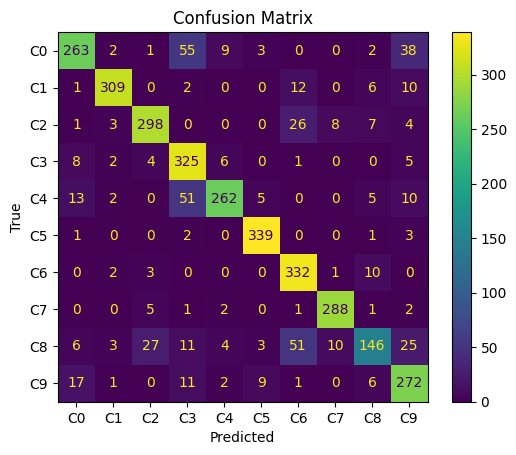

In [ ]:
predictions = []
true_labels = []

# Iterate over each batch in the test generator
for i in range(len(test_generator)):
    # Get batch of data and labels and predict on it
    batch_data, batch_labels = test_generator[i]
    batch_predictions = model.predict(batch_data, verbose=0)
    # Append predictions and true labels
    predictions.extend(np.argmax(batch_predictions, axis=1))
    true_labels.extend(np.argmax(batch_labels, axis=1))

cm = confusion_matrix(true_labels, predictions)
labels = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Saving Captura de pantalla 2024-04-18 142458.png to Captura de pantalla 2024-04-18 142458 (1).png


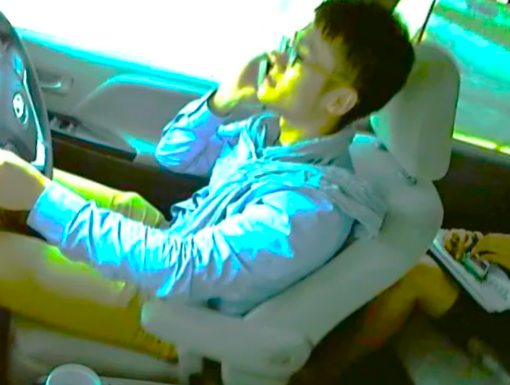

1/1 [==============================] - 0s 49ms/step
Captura de pantalla 2024-04-18 142458 (1).png is classified as:
   - safe driving with probability 0.314902007
   - hair and makeup with probability 0.197996601
   - talking on the phone - left with probability 0.191223859
Captura de pantalla 2024-04-18 142458 (1).png is not classified in any class.


In [ ]:
label_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
minimum_value = 0.78

import math

# We use the file insertion system of Colab
uploaded = files.upload()

for filename, filedata in uploaded.items():
    # Display the image using IPython.display.Image
    display(Image(data=filedata, width=300))

    # Image path configuration
    path = '/content/' + filename

    # Preprocess the image
    img = image.load_img(path, target_size=(96, 96))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Image transformation into a tensor
    image_tensor = np.vstack([x])
    #scale the tensor values between 0 and 1
    image_tensor = image_tensor / 255.0

    # Inference execution
    classes = model.predict(image_tensor)

    # Get the indices of top three classes
    top_three_indices = np.argsort(classes[0])[::-1][:3]

    # Print the top three classes and their probabilities
    print(f"{filename} is classified as:")
    for i in top_three_indices:
        probability = math.trunc(classes[0][i]*1000000000)/1000000000
        print(f"   - {label_names[i]} with probability {probability}")

    # If no class meets the threshold
    if not any(classes[0][i] > minimum_value for i in range(len(classes[0]))):
        print(filename + ' is not classified in any class.')